In [11]:
# Comparison with MrBeast tweets 

# Manually define content categories
# Load your tweet data
df = pd.read_csv("mrbeast_tweets.csv")

# Add a new empty column for content type
df["content_type"] = ""

# Display all tweets with their index and text for manual review
for idx, row in df.iterrows():
    print(f"\nTweet #{idx}")
    print(f"Media Type : {row['media_type']}")
    print(f"Text       : {row['text']}")
    
    # User input for a content type label
    content_type = input("Enter content type (e.g., Video, Challenge, Charity, Meme, Fan): ")
    
    # Store the label
    df.at[idx, "content_type"] = content_type

# Save the updated DataFrame back to CSV
df.to_csv("mrbeast_tweets.csv", index=False)
print("\n✅ Classification saved to mrbeast_tweets.csv")


Tweet #0
Media Type : photo
Text       : I took my fiancé on dates ranging from $1 all the way up to $500,000 in the new video! Madison Beer even went on a date with Nolan 😭 https://t.co/Rj1i4lzo0u


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Video



Tweet #1
Media Type : nan
Text       : Want a tour of the city for Beast Games season 2 and all the massive sets we’re building?? I’m going to personally show around people that donate  $100,000 to Beast Philanthropy! I have some big charity projects I want to fund so I think it’s a win/win ❤️

https://t.co/MHJ9sTef2d


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Charity, Fan



Tweet #2
Media Type : photo
Text       : After 6 years we have finally avenged Pewdiepie 🥹 https://t.co/V1znbyqw27


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Meme



Tweet #3
Media Type : photo
Text       : 400,000,000 subscribers! A decade ago before I blew up everyone in my life told me I was to obsessed and constantly told I’d never make it. Despite that I was in love with making content and grinded every moment my eyes were open for 7 years before anyone started watching. I… https://t.co/GkAhG8o2rj


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Fan



Tweet #4
Media Type : photo
Text       : Stop asking, I’m not buying you guys her bath water. https://t.co/VfTUqp4iSK


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Meme, Fan



Tweet #5
Media Type : nan
Text       : Imagine reading this headline to someone in medieval times


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Meme



Tweet #6
Media Type : photo
Text       : People on Tik Tok asked me to be more hood so I did and it became my most liked tik tok ever so here I am again. Idk what’s going on https://t.co/EiKTF8MwXp


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Meme, Fan



Tweet #7
Media Type : photo
Text       : Pro Athletes vs Average Joes is now live! The amount of superstars we got is insane 🥰 https://t.co/QA50zqt2Z8


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Video



Tweet #8
Media Type : photo
Text       : World class athletes vs average people goes up tomorrow, this video will blow your mind :D https://t.co/Ggx6UNqEAJ


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Video



Tweet #9
Media Type : photo
Text       : Uploaded a MrBeast 2 video showing how we built all our deadly traps! Our videos have gotten so big that people think they’re fake lol. So a big goal for me this year has been behind the scenes so you can see all the effort we put into keep them real :D https://t.co/u3FpcSnAAM


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Video



Tweet #10
Media Type : photo
Text       : When I search Feastables on Target I get this Hershey ad that conveniently uses our Feastables blue color.. 

They also buy pre roll ads on my YouTube channel and Beast Games. Stop harassing my fans Hershey, they don’t want you 😭 https://t.co/GXUfL3fOYu


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Meme



Tweet #11
Media Type : photo
Text       : Prime video has renewed Beast Games for not one but TWO MORE SEASONS!! Y’ALL ARE NOT READY FOR THE BIG STUFF WE HAVE PLANNED 🥰🥰🥰 https://t.co/oc5hWKBEnq


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Video



Tweet #12
Media Type : photo
Text       : I remember when videos used to get 37 views in a day not 37 million. I appreciate everyone that watches the videos and just know I would personally thank each of you if it was physically possible ❤️ https://t.co/EPXf2v070A


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Fan



Tweet #13
Media Type : photo
Text       : We explored dozens of 2,000 year old ancient temples in the new video to see what’s inside. One of my favorite vids :D https://t.co/hP89wAzz7r


Enter content type (e.g., Video, Challenge, Charity, Meme, Fan):  Video



✅ Classification saved to mrbeast_tweets.csv


In [12]:
df = pd.read_csv("mrbeast_tweets.csv")

# Split content_type by comma and explode into multiple rows
df["content_type"] = df["content_type"].str.split(r",\s*")  # split and remove extra spaces
df = df.explode("content_type")

# Strip whitespace from labels
df["content_type"] = df["content_type"].str.strip()

# Recalculate average engagement per content type
metrics = ["views_count", "like_count", "reply_count", "retweet_count", "quote_count"]
engagement_summary = df.groupby("content_type")[metrics].mean().sort_values("like_count", ascending=False)

print(engagement_summary)

               views_count  like_count  reply_count  retweet_count  \
content_type                                                         
Meme          1.661704e+07    243125.8       5621.4   13329.600000   
Fan           8.700923e+06    107016.4       4099.2    4321.600000   
Video         4.743515e+06     47121.5       2149.5    1856.833333   
Charity       1.063495e+06     11333.0       1587.0     747.000000   

              quote_count  
content_type               
Meme          2200.800000  
Fan           1172.400000  
Video          377.333333  
Charity         61.000000  


In [13]:
# Video - tweets where mrbeast promotes his videos

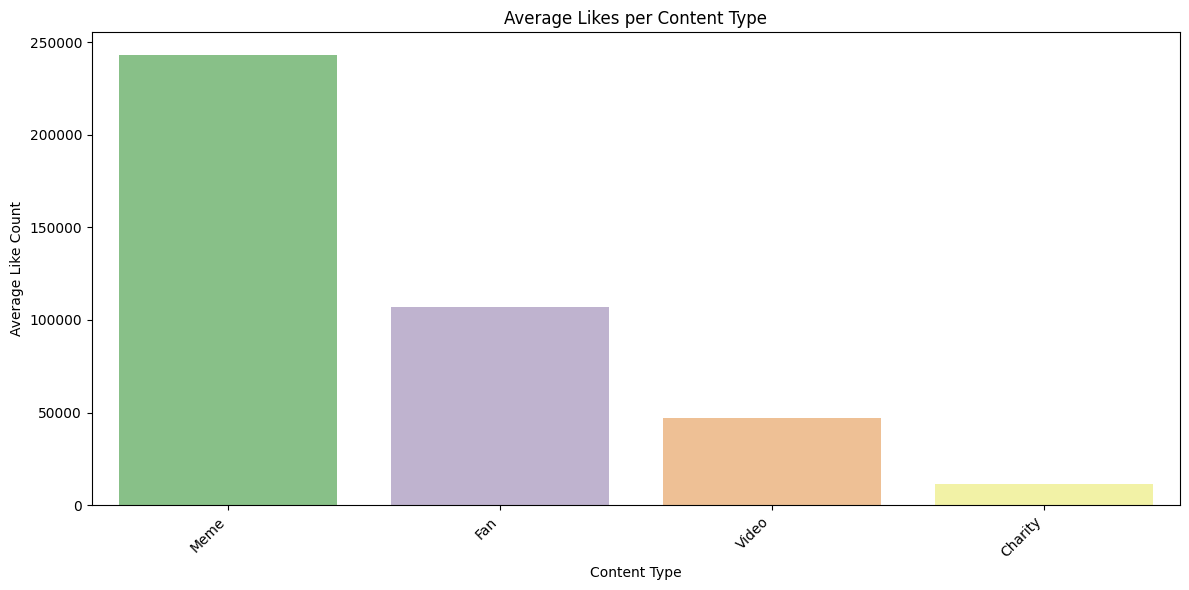

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting
engagement_summary = engagement_summary.reset_index()

# Plot average likes
plt.figure(figsize=(12, 6))
sns.barplot(data=engagement_summary, x="content_type", hue="content_type", y="like_count", palette="Accent", legend=False)

plt.title("Average Likes per Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Like Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

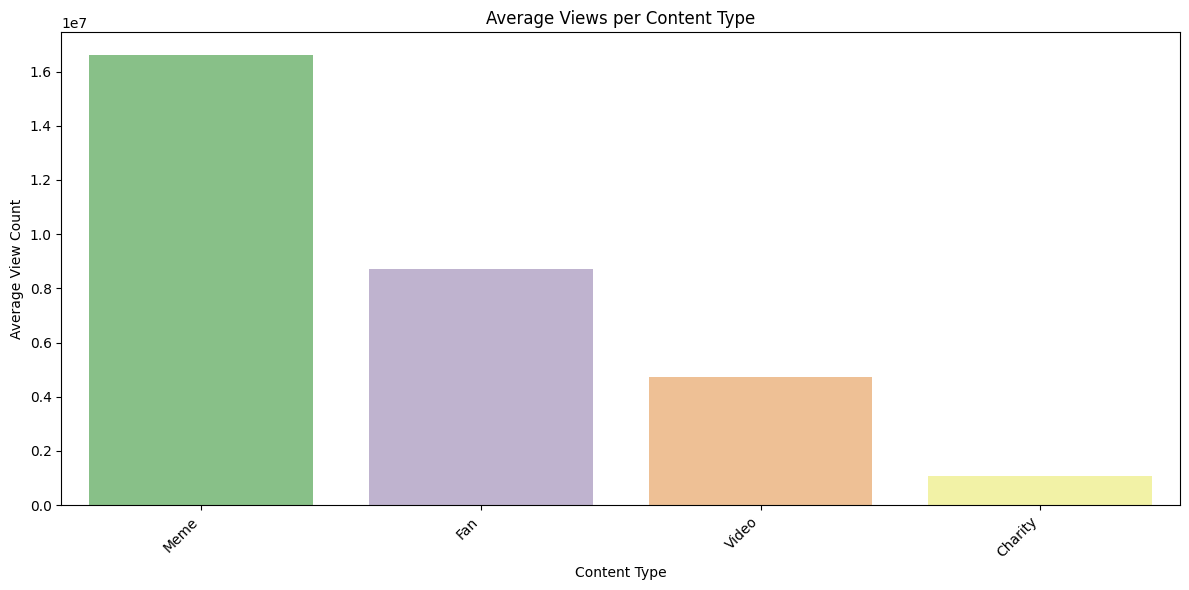

In [16]:
# Plot average views
plt.figure(figsize=(12, 6))
sns.barplot(data=engagement_summary, x="content_type", hue="content_type", y="views_count", palette="Accent", legend=False)

plt.title("Average Views per Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average View Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Load both datasets
df_speed = pd.read_csv("ishowspeed_tweets.csv")
df_beast = pd.read_csv("mrbeast_tweets.csv")

columns_needed = [
    "content_type",
    "views_count",
    "like_count",
    "retweet_count",
    "reply_count",
    "quote_count",
]

df_speed_filtered = df_speed[columns_needed].copy()
df_beast_filtered = df_beast[columns_needed].copy()

# Add creator column after filtering
df_speed_filtered["creator"] = "IShowSpeed"
df_beast_filtered["creator"] = "MrBeast"

combined = pd.concat([df_speed_filtered, df_beast_filtered], ignore_index=True)

In [20]:
# Split content_type by comma and explode into multiple rows
combined["content_type"] = combined["content_type"].str.split(r",\s*")  # split and remove extra spaces
combined = combined.explode("content_type")

# Strip whitespace from labels
combined["content_type"] = combined["content_type"].str.strip()

# Group and calculate mean engagement
avg_engagement = combined.groupby(["creator", "content_type"])[metrics].mean().reset_index()

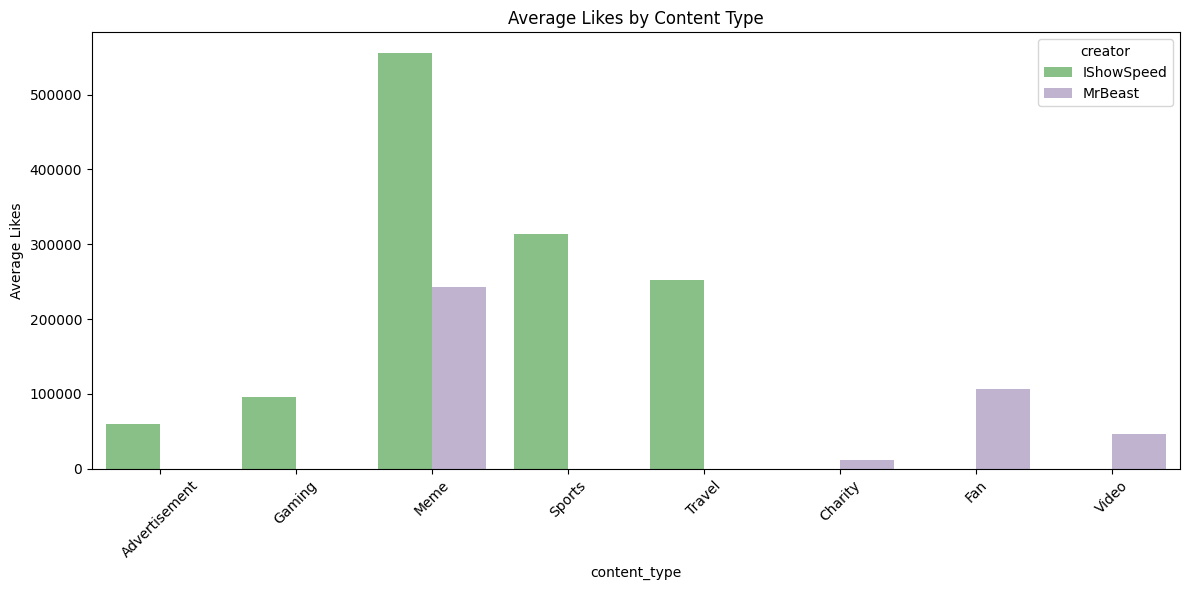

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_engagement, x="content_type", y="like_count", hue="creator", palette="Accent")
plt.title("Average Likes by Content Type")
plt.xticks(rotation=45)
plt.ylabel("Average Likes")
plt.tight_layout()
plt.show()

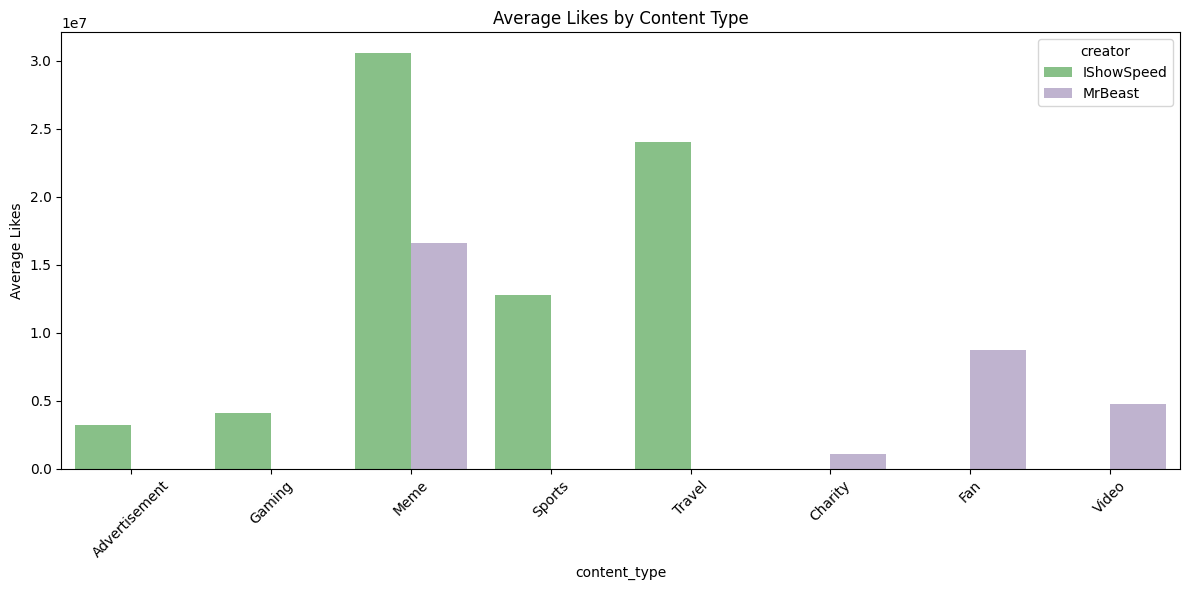

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_engagement, x="content_type", y="views_count", hue="creator", palette="Accent")
plt.title("Average Likes by Content Type")
plt.xticks(rotation=45)
plt.ylabel("Average Likes")
plt.tight_layout()
plt.show()

In [ ]:
# IShowSpeed's tweets generally has higher engagement than mrbeast's tweets
# The most noticeable here is IShowSpeed’s engagement, which spikes when he tweets something funny or meme-worthy
# Speed's humour is generally funnier than mrbeast's humour